# 第4回宿題の回答例

## fcok 基礎統計

In [3]:
import pathlib

PATH_INTERIM = pathlib.Path("../data/interim/") 

In [5]:
simport pandas as pd
# 個々のフォルダ構成に応じて変更
fcok = pd.read_feather(PATH_INTERIM/"tbhaa_random_500_000.feather")

/Users/localadmin/anaconda3/envs/suzuki/lib/python3.6/site-packages/pyarrow/pandas_compat.py:752: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels, = index.labels


In [126]:
from IPython.display import display

def display_all(df):
    with pd.option_context("display.max_columns", 1000):
        display(df)

In [127]:
display_all(fcok.head())

,V_BASE_CD,V_PROD_DIV,V_VIN,V_ENGINE_NO,V_MOTOR_NO,V_MISSON_NO,V_KEY_NO,V_FCOK,V_FCOK_TIME,V_ABOK,V_ABOK_TIME,V_PROD_MODEL_CD,V_SALES_MODEL_CD,V_SALES_MODEL_NM,V_SPEC,V_COLOR,V_PLANT_CD,V_DIST_CD,V_BRANCH_CD,V_SHIPPING_DATE,V_SHIPPING_FCOK,V_SHIPPING_ABOK,V_INVOICE_NO,V_SALES_NO,V_CASE_NO,V_SRC_DIV,V_CRT_TIME_STAMP
0,100100,B,JSAETD01V00150837,G16B-543799,None,R164133,18873,19940401,203900,19940401,164500,YE7B6CDF,SE416W,None,E39,38B,None,225502,None,19940426,None,None,BT-13584,BWD-3494,000212,1,16-12-15 10:50:08.775114000
1,100100,B,JS2AC35S7R5100030,G13R115881,None,R544291,U1142,19940401,115800,19940401,102400,Y4F16TDB,SF413,None,E03,15P,None,304520,None,19940424,None,None,BT-13545,BAD-1233,412842,1,16-12-15 10:50:08.833788000
2,100100,B,DA21T-135279,F10A-1002472,None,None,U7483,19940401,172300,19940401,131100,Y8AT4BBB,SK410,None,E43,0RB,None,117520,None,19940421,None,None,BEP-8126,BJI-1153,000001,1,16-12-15 10:50:08.552591000
3,100100,B,JS2AC34SXR5100573,G13R115114,None,R544764,U1769,19940404,154600,19940401,160000,Y9K16TDD,SF413,None,E03,26U,None,304520,None,19940424,None,None,BT-13545,BAD-1233,412882,1,16-12-15 10:50:09.310208000
4,100100,B,JS2AE35S3R5103677,G13R115075,None,R544012,U1186,19940401,160400,19940331,152600,Y1W16TDB,SF413,None,E03,1FG,None,304520,None,19940521,None,None,BT-13663,BAD-1238,413247,1,16-12-15 10:50:08.878607000


In [133]:
fcok.V_SHIPPING_DATE.isna().value_counts()

True     260243
False    239757
Name: V_SHIPPING_DATE, dtype: int64

### describe

In [6]:
fcok.describe(include="all")

,V_BASE_CD,V_PROD_DIV,V_VIN,V_ENGINE_NO,V_MOTOR_NO,V_MISSON_NO,V_KEY_NO,V_FCOK,V_FCOK_TIME,V_ABOK,...,V_DIST_CD,V_BRANCH_CD,V_SHIPPING_DATE,V_SHIPPING_FCOK,V_SHIPPING_ABOK,V_INVOICE_NO,V_SALES_NO,V_CASE_NO,V_SRC_DIV,V_CRT_TIME_STAMP
count,500000,500000,500000,492064,0.0,151411,259818,500000,467937,467382,...,376991,164184,239757,1190,1190,163730,163845,163845,500000,500000
unique,24,5,500000,489823,0.0,142315,11011,6898,63069,6746,...,2783,1181,7691,705,704,47183,29414,52313,1,499973
top,100100,B,MH23S-505815,157FMI-3B2X54,NaN,,,20120523,000000,20,...,304010,361000,20160404,20130314,20150202,,AAD-2383,000001,1,16-12-15 15:28:32.428369000
freq,352768,317455,1,23,NaN,6640,3380,214,16387,6929,...,24999,11987,194,10,9,133,357,1361,500000,2


### 不要な列の削除

In [8]:
# n_uniqueでfilter
fcok_sub = fcok.loc[:, fcok.nunique() > 1]

In [11]:
pct_nan = fcok_sub.isna().sum().to_frame(name = "n_nan")
pct_nan["pct_nan"] = pct_nan["n_nan"] / fcok_sub.shape[0]

In [13]:
pct_nan.sort_values(by="pct_nan", ascending=False)

,n_nan,pct_nan
V_SHIPPING_FCOK,498810,0.997620
V_SHIPPING_ABOK,498810,0.997620
V_MISSON_NO,348589,0.697178
V_INVOICE_NO,336270,0.672540
V_CASE_NO,336155,0.672310
V_SALES_NO,336155,0.672310
V_BRANCH_CD,335816,0.671632
V_SHIPPING_DATE,260243,0.520486
V_KEY_NO,240182,0.480364
V_SALES_MODEL_CD,123689,0.247378


In [14]:
%matplotlib inline

### ヒストグラム

In [22]:
# histogram
import math
import matplotlib.pyplot as plt

def plot_hist(df, subplot_col=5):
    fig = plt.figure(figsize=(15,10))
    sl = [s for _, s in df.iteritems() if s.dtype.name != "object"]
    k = len(sl)
    for i, s in enumerate(sl):
        ax = fig.add_subplot(math.ceil(k / subplot_col), subplot_col, i+1)
        s.hist()
    plt.tight_layout()

In [23]:
# カテゴリタイプの列しかないので、ヒストグラムは書けない
plot_hist(fcok_sub)

<Figure size 1080x720 with 0 Axes>

In [37]:
# category

def plot_cat(df, subplot_col=5, topN=5, include_other=True):
    fig = plt.figure(figsize=(19,15))
    sl = [s for _, s in df.iteritems() if s.dtype.name == "object"]
    k = len(sl)
    for i, s in enumerate(sl):
        ax = fig.add_subplot(math.ceil(k / subplot_col), subplot_col, i+1)
        vc = s.value_counts()
        vc_top = vc[:topN]
        if include_other: vc_top["other"] = vc[topN:].sum()
        vc_top.plot(kind="bar")
    plt.tight_layout()

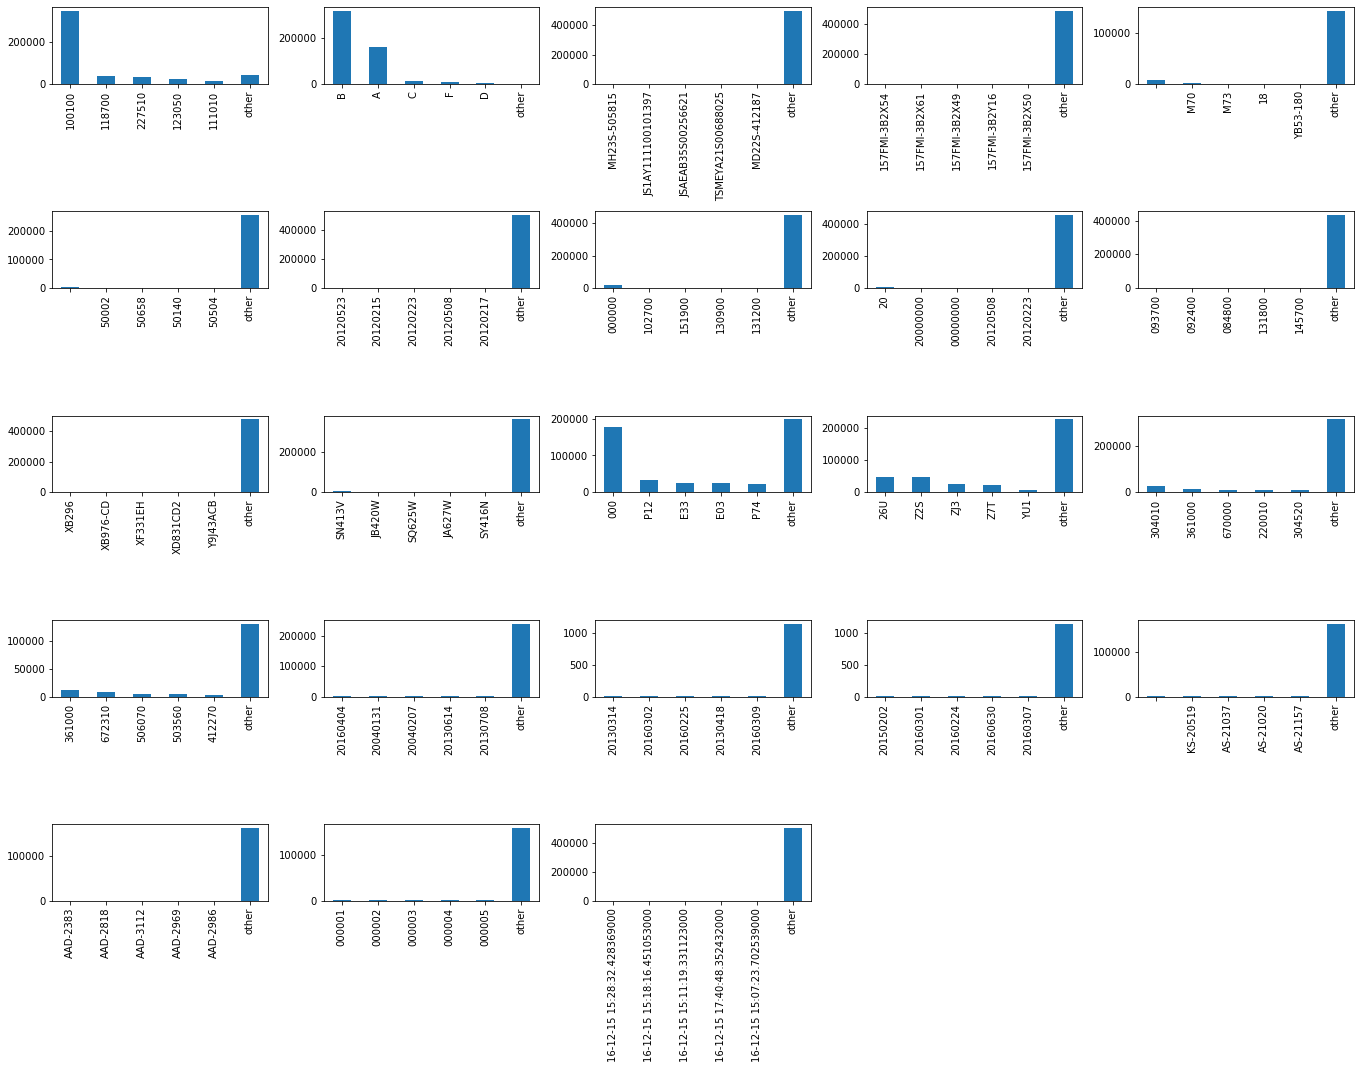

In [38]:
plot_cat(fcok_sub)

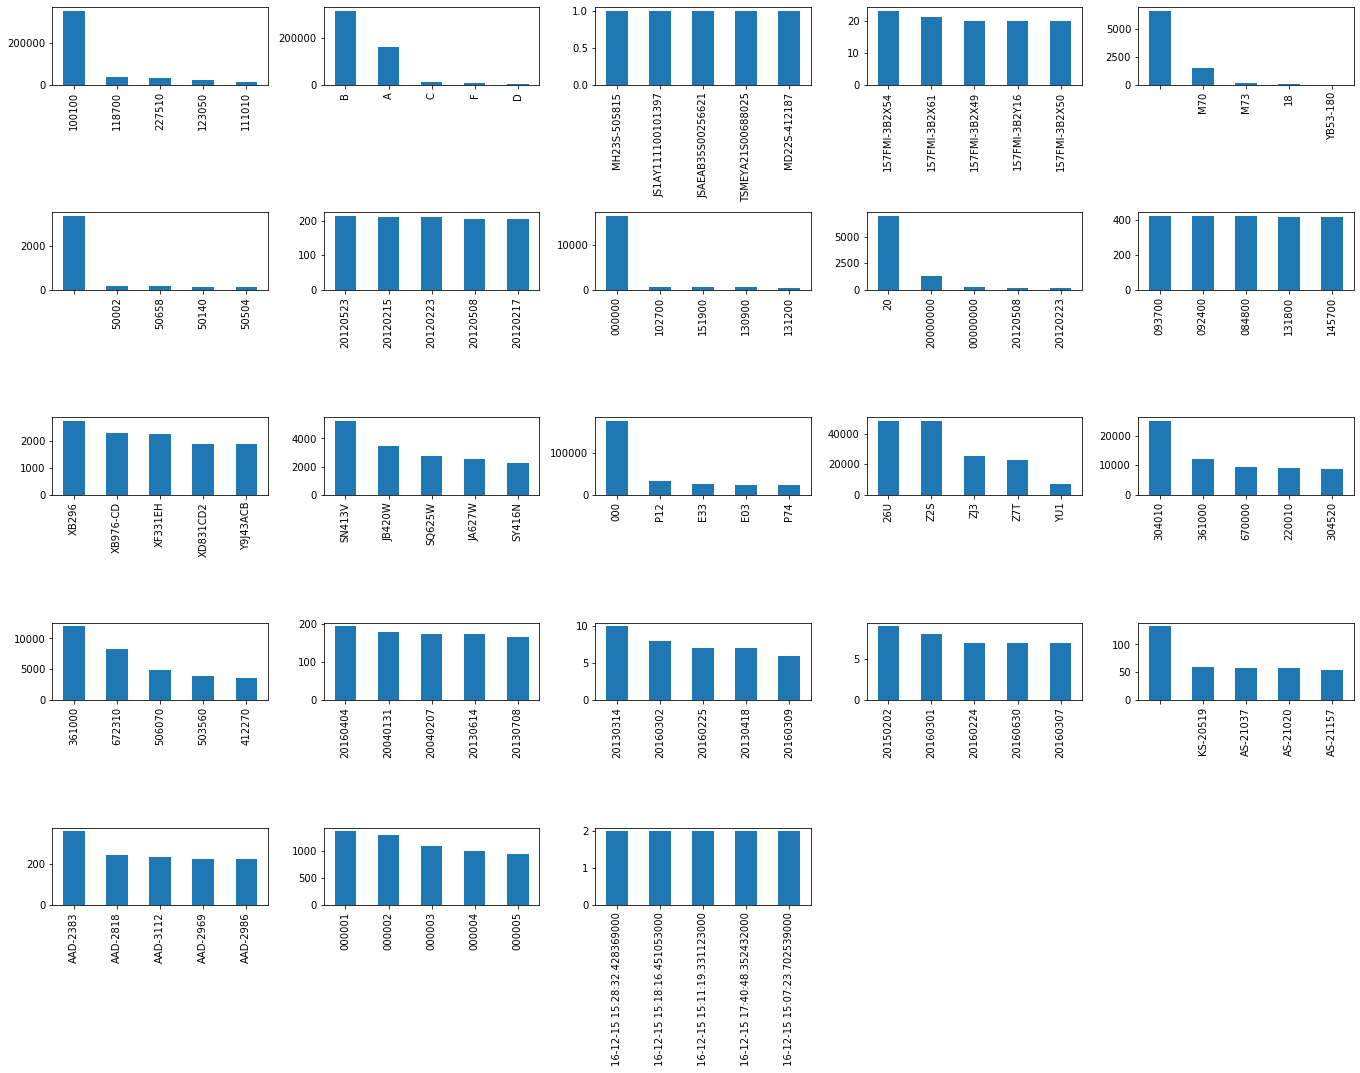

In [39]:
# otherを除く
plot_cat(fcok_sub, include_other=False)

### 相関係数

In [42]:
# カテゴリタイプの列しかないので、相関係数はない
df_corr = fcok_sub.corr(method="spearman")

In [43]:
df_corr

""


In [44]:
# NaNか否かをTrue,False (1, 0) で表すようなDataFrameを作成し、相関係数を算出
df_corr_nan = fcok_sub.isna().corr(method="spearman")

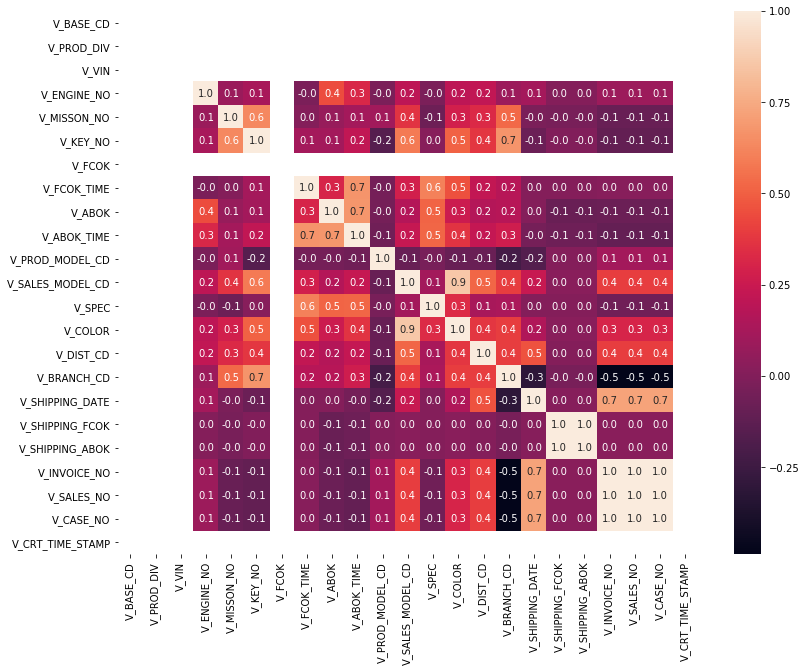

In [53]:
import seaborn as sns

plt.figure(figsize=(13,10))
sns.heatmap(df_corr_nan, annot=True, fmt=".1f")

In [55]:
# クラメールの連関係数を計算する場合のsample
# https://bellcurve.jp/statistics/glossary/1263.html
import numpy as np
import scipy.stats as ss

def cramers_v(x, y):
    """https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9
    """
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [57]:
cramers_v(fcok_sub.V_BASE_CD, fcok_sub.V_COLOR)

0.8254960174738115

### 時系列

In [94]:
# monthly time series
fcok_sub["month"] = pd.to_datetime(fcok_sub.V_FCOK.str[:6] + "01")

/Users/localadmin/anaconda3/envs/suzuki/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [95]:
n_fcok_monthly = fcok_sub.groupby("month")["V_VIN"].agg({"n":len})

/Users/localadmin/anaconda3/envs/suzuki/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


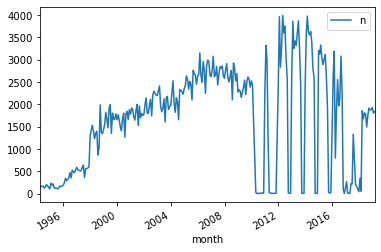

In [97]:
n_fcok_monthly.plot()

In [99]:
# 別の方法もある

fcok_sub["date"] = pd.to_datetime(fcok_sub.V_FCOK)
n_fcok_monthly_another = (fcok_sub
                          .groupby(pd.Grouper(key="date", freq="MS"))["V_VIN"]
                          .agg({"n":len}))

/Users/localadmin/anaconda3/envs/suzuki/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


In [102]:
n_fcok_monthly_another.head()

,n
date,
1994-04-01,118
1994-05-01,160
1994-06-01,161
1994-07-01,167
1994-08-01,120


In [103]:
n_fcok_monthly.head()

,n
month,
1994-04-01,118
1994-05-01,160
1994-06-01,161
1994-07-01,167
1994-08-01,120


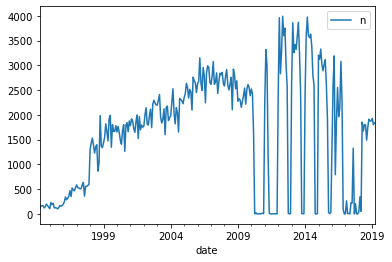

In [100]:
n_fcok_monthly_another.plot()

### Optional: 上位X件をプロット

In [101]:
top_model = fcok_sub.V_PROD_MODEL_CD.value_counts().index

In [117]:
tmp.index.min()

Timestamp('2012-03-01 00:00:00')

/Users/localadmin/anaconda3/envs/suzuki/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  # Remove the CWD from sys.path while we load stuff.


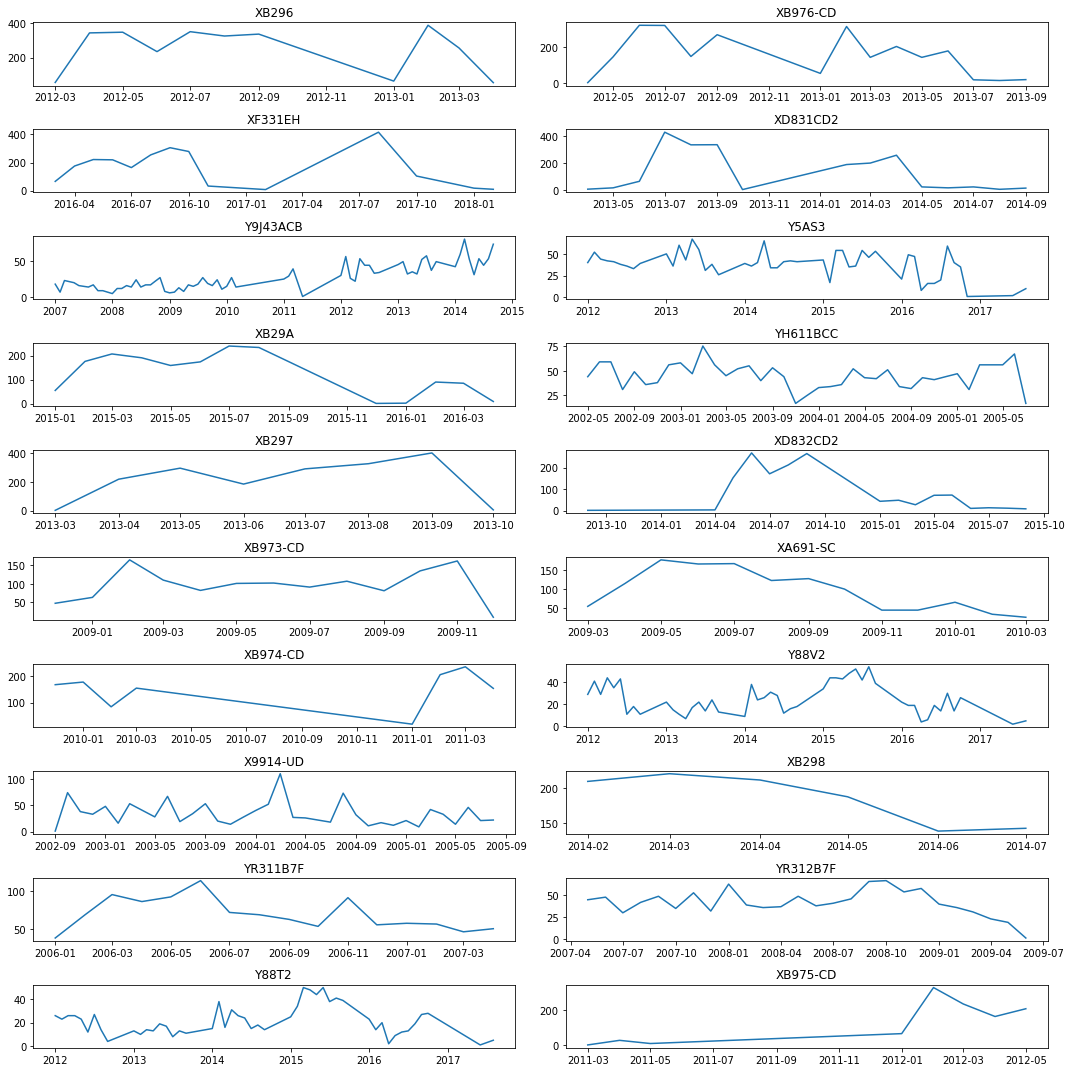

In [125]:
import matplotlib.dates as mdates
from datetime import datetime

fig = plt.figure(figsize=(15,15))
for i, x in enumerate(top_model[:20]):
    ax = fig.add_subplot(10, 2, i+1)
    tmp = (fcok_sub
           .loc[fcok_sub.V_PROD_MODEL_CD == x]
           .groupby("month")["V_VIN"]
           .agg({"n":len}))
    ax.plot(tmp.index, tmp.values)
    ax.set_title(x)
    # t_max, t_min = tmp.index.max(), tmp.index.min()
    # ax.set_xlim(t_min, t_max)
    # ax.xaxis.set_ticks(pd.date_range(t_min, t_max, freq="Y"))
    # ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  
plt.tight_layout()

## notebook 3.3 pandasセクションの問題

3.4_AkihiroSanada_DataCheck_SkillTransfer_Answer.ipynbを参照